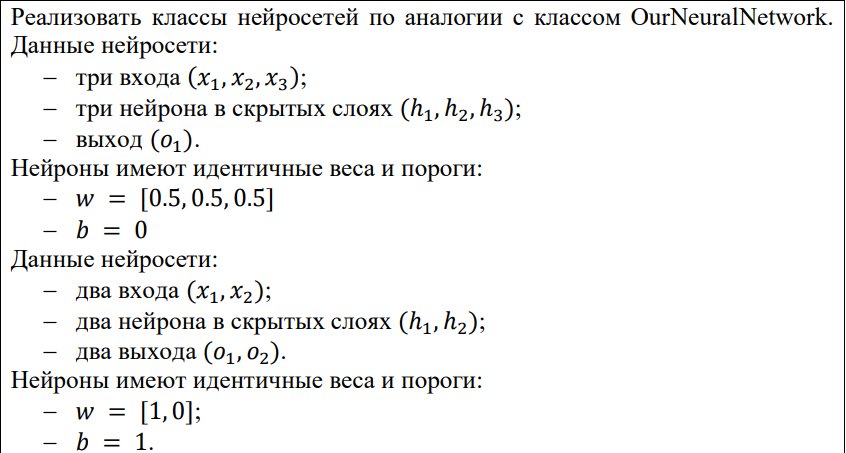


In [3]:
import numpy as np
def sigmoid(x):
    # функцияя активации: f(x) = 1 / (1 + e^(-x))
    return 1/(1+np.exp(-x))
class Neuron:
    def __init__(self,weights, bias):
        self.weights = weights
        self.bias = bias
    def Feedforward(self,inputs):
        total = np.dot(self.weights, inputs) + self.bias 
        return sigmoid(total)
class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5]) #веса
        bias = 0 #порог
        self.h1 = Neuron(weights,bias)
        self.h2 = Neuron(weights,bias)
        self.h3 = Neuron(weights,bias)#3 скрытых слоя
        self.o1 = Neuron(weights,bias)#1 выход
    def feedforward(self,x):
        out_h1 = self.h1.Feedforward(x)
        out_h2 = self.h2.Feedforward(x)
        out_h3 = self.h2.Feedforward(x)
        out_o1 = self.o1.Feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1
network = OurNeuralNetwork()
x = np.array([2,3,4]) #3 входа
print(network.feedforward(x))

0.8151036049051821


In [4]:
import numpy as np
def sigmoid(x):
    # функцияя активации: f(x) = 1 / (1 + e^(-x))
    return 1/(1+np.exp(-x))
class Neuron:
    def __init__(self,weights, bias):
        self.weights = weights
        self.bias = bias
    def Feedforward(self,inputs):
        total = np.dot(self.weights, inputs) + self.bias 
        return sigmoid(total)
class OurNeuralNetwork:
    def __init__(self):#конструктор
        weights = np.array([1, 0]) #веса
        bias = 1 #порог
        self.h1 = Neuron(weights,bias)
        self.h2 = Neuron(weights,bias)#2 скрытых слоя
        self.o1 = Neuron(weights,bias)#1 выход
        self.o2 = Neuron(weights,bias)#2 выход
    def feedforward(self,x):
        out_h1 = self.h1.Feedforward(x)
        out_h2 = self.h2.Feedforward(x)
        # входы для о1 - это выходы h1 и h2
        out_o1 = self.o1.Feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.Feedforward(np.array([out_h1, out_h2]))
        return out_o1
network = OurNeuralNetwork()
x = np.array([2,3]) #2 входа
print(network.feedforward(x))

0.8757270529783324


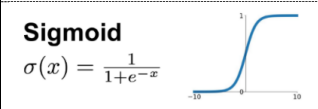


import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)
weights = np.array([0,1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2,3])
print(n.feedforward(x))



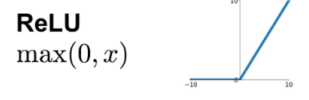

In [5]:
import numpy as np
def ReLU(x):
    return max(0,x)
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return ReLU(total)
weights = np.array([0,1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2,3])
print(n.feedforward(x))

7


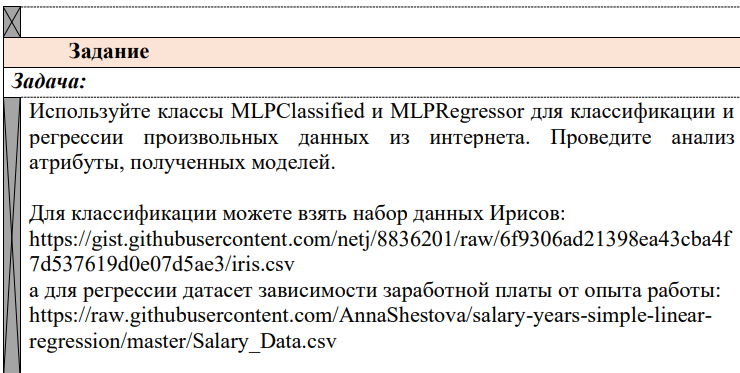

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
Dataset Sizes:  (1797, 64) (1797,)
Dataset Sizes:  (20640, 8) (20640,)
Train/Test Sizes:  (1437, 64) (360, 64) (1437,) (360,)
[5 9 9 6 1 6 6 9 8 7 4

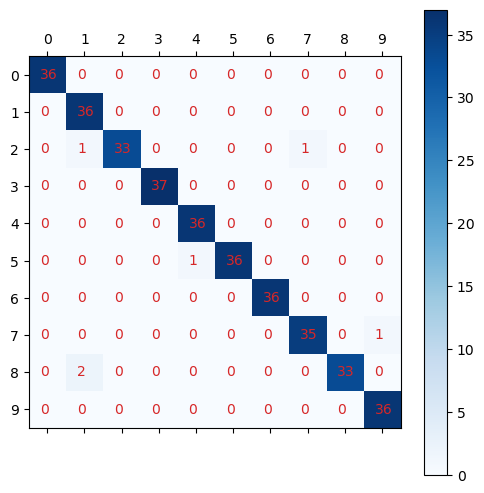

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

dataset = sns.load_dataset('iris')
print(dataset)
dataset.shape
dataset.head()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset.iloc[:,:-1],
    dataset.iloc[:, -1],
    test_size = 0.20
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train.head()
y_train.head()

from sklearn.datasets import load_digits

digits = load_digits()
X_digits, Y_digits = digits.data, digits.target
print('Dataset Sizes: ', X_digits.shape, Y_digits.shape)

from sklearn.datasets import fetch_california_housing
cal = fetch_california_housing()
X_cal, Y_cal = cal.data, cal.target
print('Dataset Sizes: ', X_cal.shape, Y_cal.shape)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, train_size=0.80, test_size=0.20, stratify=Y_digits, random_state=123)
print('Train/Test Sizes: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)
Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(Y_test[:15])
# метод score для оценки точноси моделей классификации
print('Test Accuracy: %.3f'%mlp_classifier.score(X_test, Y_test))

print('Training Accuracy: %.3f'%mlp_classifier.score(X_train, Y_train))
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(10), range(10))
    plt.xticks(range(10), range(10))
    plt.colorbar();
    for i in range(10):
        for j in range(10):
            plt.text(i-0.2, j+0.1, str(conf_mat[j, i]), color='tab:red')

plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))


In [7]:
# продолжение
import pandas as pd
import numpy as np
import matplotlib.pyplot as pls
url = r'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataset = pd.read_csv(url)
dataset.head()

print(dataset.shape)
dataset.describe()
from sklearn.tree import DecisionTreeRegressor
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print (X)
print (y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_test, Y_train, Y_test = train_test_split(X_cal, Y_cal, train_size=0.80, test_size=0.20, random_state=123)
print('Train/Test Sizes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(X_train, Y_train)
Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])
# метод score оценивает точность моделей классификации
print('Test Accuracy Score : %.3f'%mlp_regressor.score(X_test, Y_test))
print('Training Accuracy Score : %.3f'%mlp_regressor.score(X_train, Y_train))
print('Loss:', mlp_regressor.loss_)
print('Number of Coefs:', len(mlp_regressor.coefs_))
[weights.shape for weights in mlp_regressor.coefs_]
print('Number of Iterations for Which Estimator Ran:', mlp_regressor.n_iter_)
print('Name of Output Layer Activation Function:', mlp_regressor.out_activation_)

(30, 2)
[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
Train/Test Sizes: (16512, 8) (4128, 8) (16512,) (4128,)
[1.90219935 1.43047514 1.3506227  0.76890059 2.34997826 2.56749015
 0.78763273 1.84240978 1.57480889 1.25957592]
[1.516 0.992 1.345 2.317 4.629 1.407 1.703 1.603 1.018 1.688]
Test Accuracy Score : 0.417
Training Accuracy Score : 0.418
Loss: 0.4300269886704838
Number of Coefs: 2
Number of Iterations for Which Estimator Ran: 28
Name of Output Layer Activation Function: identity


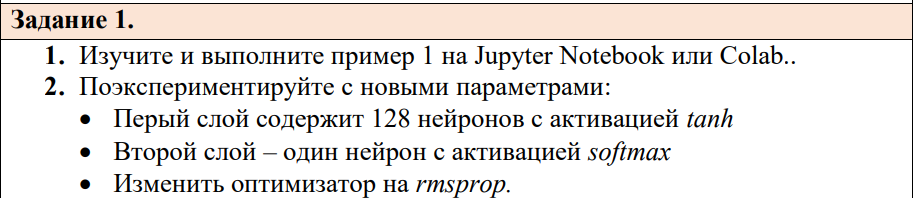

In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

#генерация данных
X = np.random.rand(1000,20)
y = np.random.randint(2,size=(1000,1))
#создание модели
model = Sequential()
model.add(Dense(128,input_dim=20,activation='tanh'))
model.add(Dense(1,activation='softmax'))
# компиляция модели
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
#обучение модели
model.fit(X,y,epochs=10,batch_size=32)
#оценка модели
loss,accuracy = model.evaluate(X,y)
print(f'Loss:{loss},Accuracy:{accuracy}')


ModuleNotFoundError: No module named 'keras'

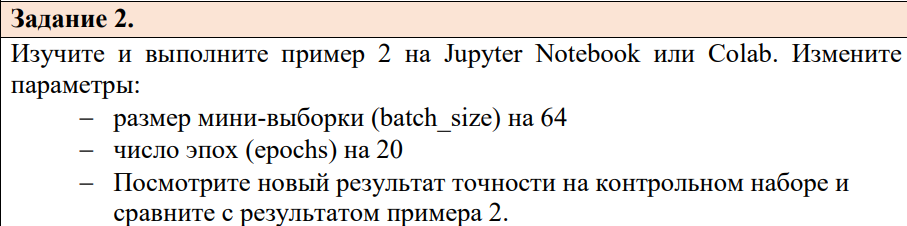

In [67]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape


(60000, 28, 28)

In [69]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [71]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [73]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32")/255

In [79]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9987 - loss: 0.0062
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9989 - loss: 0.0051
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9995 - loss: 0.0030
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9996 - loss: 0.0027
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9999 - loss: 0.0013


In [81]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([2.2753287e-11, 8.1188811e-15, 6.9037104e-10, 1.2755309e-07,
       2.7195560e-16, 7.2684453e-13, 1.8144434e-16, 9.9999988e-01,
       6.3139862e-12, 1.5137007e-09], dtype=float32)

In [17]:
predictions[0].argmax()

1

In [19]:
predictions[0][7]

0.10437828

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1160 - loss: 2.3010
test_acc: 0.11349999904632568


In [83]:
model.fit(train_images, train_labels, epochs=20, batch_size=64)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9998 - loss: 0.0015
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9997 - loss: 0.0021
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9993 - loss: 0.0022
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9998 - loss: 0.0011
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9999 - loss: 6.0670e-04
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 2.9674e-04
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 2.0525e-04
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 1.8209e-04
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 1.0593e-04
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 1.0000 - loss: 9.3564e-05
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 8.2948e-05
Epoch 12/20
938/938 ━━━━

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

In [ ]:
predictions[0].argmax()

In [ ]:
predictions[0][7]

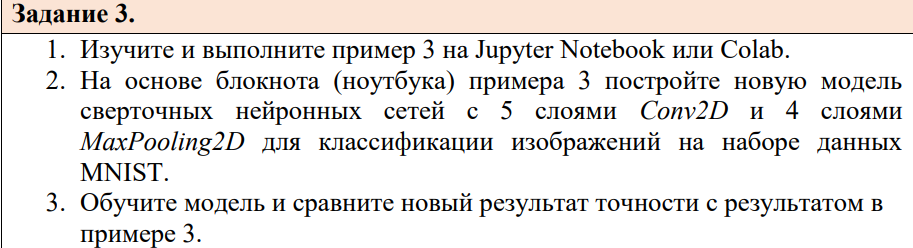

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

# Создание новой модели с 5 Conv2D и 4 MaxPooling2D
inputs = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding="same")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same")(x)

x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same")(x)

x = layers.MaxPooling2D(pool_size=2)(x)  # Последний слой уменьшения размера
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding="same")(x)

x = layers.Flatten()(x)

outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 1, 1, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,573,130 (6.00 MB)

 Trainable params: 1,573,130 (6.00 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.datasets import mnist

# Загрузка данных MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

# Компиляция модели
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
# Обучение модели
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 16s 1us/step
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 73ms/step - accuracy: 0.8107 - loss: 0.5596
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 67s 71ms/step - accuracy: 0.9861 - loss: 0.0476
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 71ms/step - accuracy: 0.9907 - loss: 0.0313
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 70ms/step - accuracy: 0.9932 - loss: 0.0212
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 70ms/step - accuracy: 0.9961 - loss: 0.0142


In [15]:
# Оценка точности модели
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9862 - loss: 0.0497
Test accuracy: 0.989


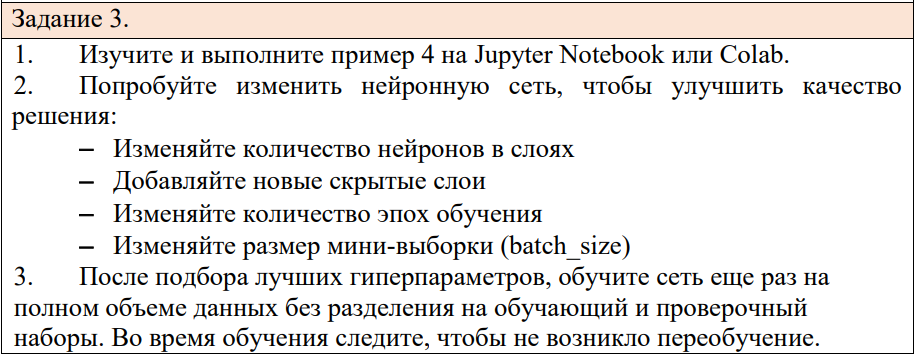

In [7]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import SGD
import matplotlib.pyplot as plt
np.random.seed(42)#задаем seed для повторяемости результатов
(X_train, y_train),(X_test, y_test) = cifar10.load_data()#загрузка из cifar10

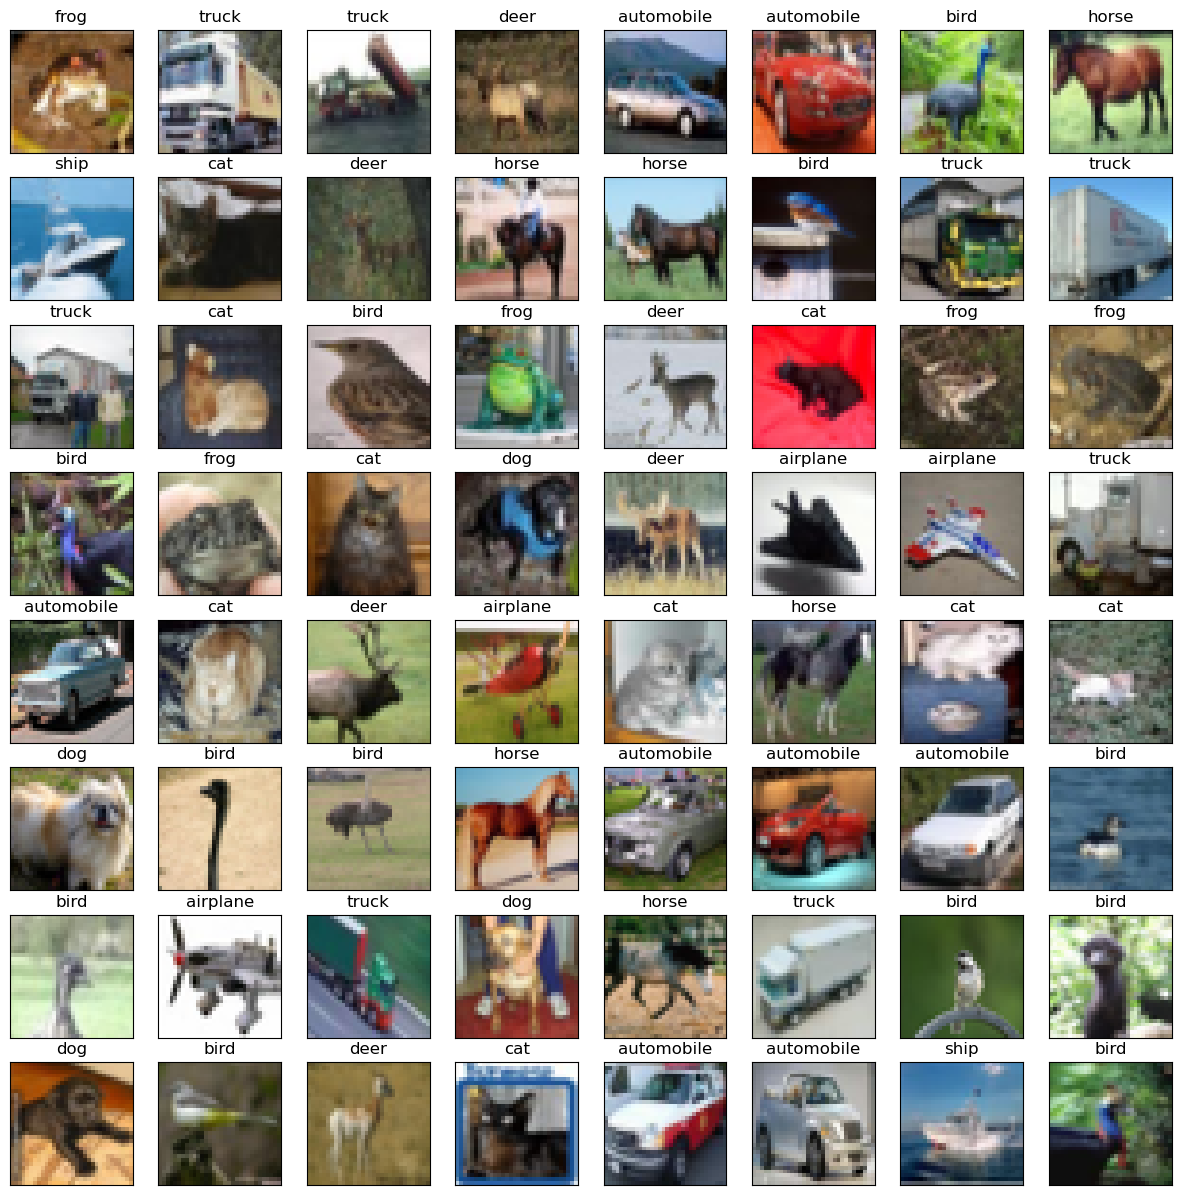

In [9]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(15,15))

#прокрутить первые 25 изображений
for i in range(64):
    #создаем подсюжет (subplot) для каждого изображения
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #показываем изображение
    plt.imshow(X_train[i])
    #устанавливаем метку в качестве заголовка
    plt.title(class_names[y_train[i][0]],fontsize=12)
plt.show()

In [12]:
#размер мини-выборки
batch_size = 32
#количество классов изображений
nb_classes = 10
#кол-во эпох
nb_epoch = 25
#размер изображений
img_rows, img_cols = 32,32
#кол-во каналов в изображении: RGB
img_channels = 3

#нормализуем данные
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
#преобразуем метки в категории
Y_train = to_categorical(y_train,nb_classes)
Y_test = to_categorical(y_test, nb_classes)

model = Sequential()

# Первый сверточный слой для работы с двумерными данными Conv2D
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))
#второй сверточный слой
model.add(Conv2D(32,(3,3), activation='relu',padding='same'))
#первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2,2)))

#слой регуляризации dropout
model.add(Dropout(0.25))
#третий сверточный слой
model.add(Conv2D(64,(3,3), activation='relu',padding='same'))
#второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2,2)))
#слой регуляризации dropout
model.add(Dropout(0.25))

#слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#полносвязный слой для классификации
model.add(Dense(512,activation='relu'))
#слой регуляризации Dropout
model.add(Dropout(0.5))
#выходной полносвязный слой
model.add(Dense(nb_classes,activation='softmax'))
print(1)

F:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1


In [14]:
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

F:\anaconda\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [16]:
# Обучаем модель
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    validation_split=0.1,
                    shuffle=True,
                    verbose=2)

Epoch 1/25
1407/1407 - 68s - 48ms/step - accuracy: 0.3766 - loss: 1.7060 - val_accuracy: 0.5260 - val_loss: 1.3170
Epoch 2/25
1407/1407 - 80s - 57ms/step - accuracy: 0.5360 - loss: 1.2971 - val_accuracy: 0.5898 - val_loss: 1.1616
Epoch 3/25
1407/1407 - 65s - 46ms/step - accuracy: 0.5941 - loss: 1.1428 - val_accuracy: 0.6334 - val_loss: 1.0264
Epoch 4/25
1407/1407 - 62s - 44ms/step - accuracy: 0.6365 - loss: 1.0290 - val_accuracy: 0.6962 - val_loss: 0.8682
Epoch 5/25
1407/1407 - 57s - 40ms/step - accuracy: 0.6608 - loss: 0.9581 - val_accuracy: 0.7122 - val_loss: 0.8428
Epoch 6/25
1407/1407 - 72s - 51ms/step - accuracy: 0.6807 - loss: 0.9065 - val_accuracy: 0.7114 - val_loss: 0.8342
Epoch 7/25
1407/1407 - 72s - 51ms/step - accuracy: 0.7002 - loss: 0.8554 - val_accuracy: 0.7142 - val_loss: 0.8180
Epoch 8/25
1407/1407 - 94s - 67ms/step - accuracy: 0.7139 - loss: 0.8160 - val_accuracy: 0.7312 - val_loss: 0.7943
Epoch 9/25
1407/1407 - 70s - 50ms/step - accuracy: 0.7249 - loss: 0.7860 - val_a

In [20]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 74.49%


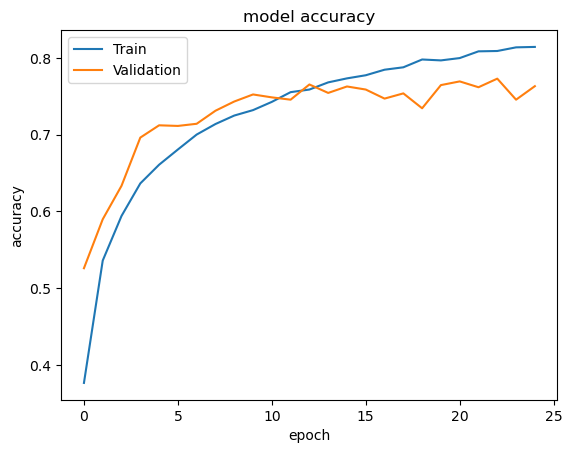

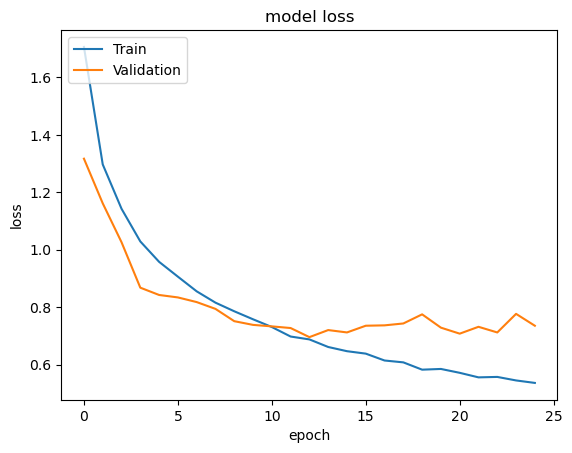

In [22]:
# Подвести итог history для точности
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Подвести итог history для потерь
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
